#  Lab 5-  Support Vector Machines (SVM)

**Objectives**: Implement SVM classifiers  for linearly and nonlinearly separable datasets. 

SVM with Gaussian Radial Basis Function (RBF) kernel. 

Cross validation to select the best SVM parameters. 

In [2]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#to load matlab mat files
from scipy.io import loadmat

### PART 1 - Linearly separable Data (linear SVM)

File *ex6data1.mat* consists of 2D linearly separable dataset (i.e. with linear boundary between the two classes).  

In [3]:
# load the file ex6data1.mat  and extract arrays X and y.
ex6_data = loadmat('ex6data1.mat')
X = ex6_data['X']
y = ex6_data['y']

X.shape, y.shape

((51, 2), (51, 1))

### Plot data

Plot the data to get Fig.1. In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1; 4.1). You will see how this outlier affects the SVM decision boundary.

<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1 ** : **Dataset 1 (ex6data1.mat)** </center></caption>

(-0.11002474999999999, 4.21142975, 1.4677749999999998, 4.766125)

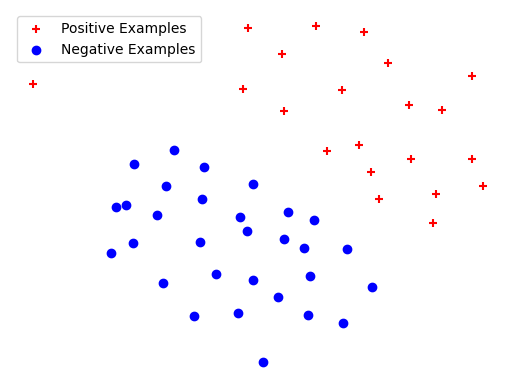

In [4]:
# Create Fig.1

plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='r', marker='+', label='Positive Examples')
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='b', marker='o', label='Negative Examples')
plt.legend()
plt.axis('off')



### SVM training

Scikit-learn (sklearn) is a free machine learning library for Python. It has various machine learning algorithms. It also supports Python numerical and scientific libraries like NumPy and SciPy.

*C* parameter is a positive value that controls the penalty for misclassified training examples. A large *C* tells the SVM to try to classify all examples correctly. 

*C* plays a role similar to $1/\lambda$ where $\lambda$ is the regularization parameter used for Logistic Regression. 

When C = 1, SVM will put the decision boundary in the gap between the two datasets and misclassifies the data point on the far left. 

When C = 100, SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural data fit. 


In [5]:
# From library sklearn.svm import function SVC to train SVM classifier.
# Choose linear kernel and train with different values of parameter C, for example C=1. 

from sklearn.svm import SVC

#Declare the classifier 
classifier = SVC(kernel='linear', C=1)

#Fit the classifier 
classifier.fit(X, y.flatten())

#Print the classifier score (accuracy)  #ANSWER arround 98% accuracy
print(classifier.score(X, y.flatten())*100)


98.0392156862745


### Plot data + decision boundary

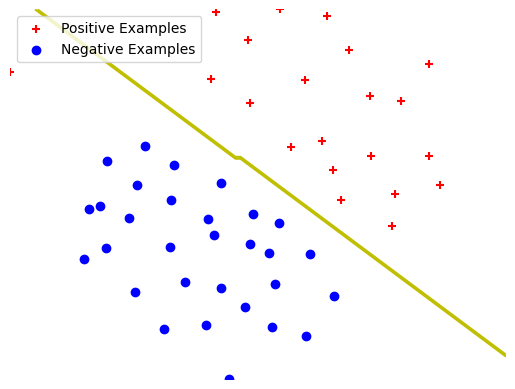

In [6]:
#PLot the data as in Fig.1 
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='r', marker='+', label='Positive Examples')
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='b', marker='o', label='Negative Examples')
plt.legend()
plt.axis('off')



num=100
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num),np.linspace(X[:,1].min(),X[:,1].max(),num))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")


In [7]:
# Repeat SVM training for C = 100 and get accuracy 100%
classifier = SVC(kernel='linear', C=100)
classifier.fit(X, y.flatten())
print(classifier.score(X, y.flatten())*100)

100.0


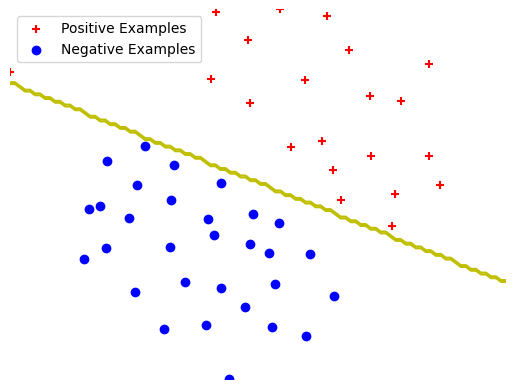

In [8]:
#Plot data + decision boundary
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], c='r', marker='+', label='Positive Examples')
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], c='b', marker='o', label='Negative Examples')
plt.legend()
plt.axis('off')
num=100
X_1,X_2 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num),np.linspace(X[:,1].min(),X[:,1].max(),num))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")



## PART 2 - Nonlinearly separable data  (SVM with Gaussian RBF Kernel)

Repeat the steps as in Part 1 bu now with nonlinearly separable data and Gaussian rbf kernel SVM.  

In [9]:
# Read ex6data2.mat and extract the saved arrays (as in Part 1)
ex6_data2 = loadmat('ex6data2.mat')

X2 = ex6_data2['X']
y2 = ex6_data2['y']

X2.shape, y2.shape

((863, 2), (863, 1))

### Plot data

Plot the data to get Fig.2. From the figure, you can observe that there is nonlinear decision boundary that separates the + and - examples for this dataset. By using SVM with Gaussian kernel, you will be able to learn a nonlinear decision boundary that fits better this data set.

<img src="images/f2.png" style="width:350px;height:250px;">
<caption><center> **Fig.2 ** : **Dataset 2 (ex6data2.mat)** </center></caption>

(-0.0027649549999999995, 1.046543855, 0.3733338, 1.0178942)

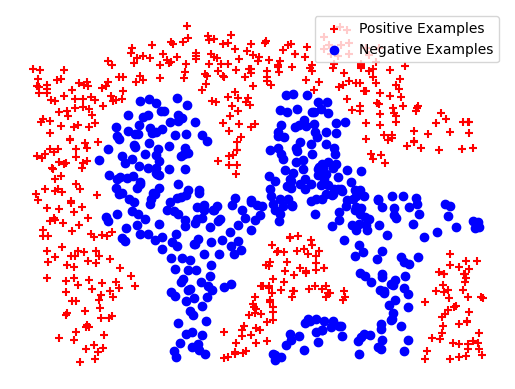

In [10]:
# Create Fig.2
plt.scatter(X2[y2.flatten() == 1, 0], X2[y2.flatten() == 1, 1], c='r', marker='+', label='Positive Examples')
plt.scatter(X2[y2.flatten() == 0, 0], X2[y2.flatten() == 0, 1], c='b', marker='o', label='Negative Examples')
plt.legend()
plt.axis('off')



### Gaussian SVM training

Choose *rbf* (Radial Basis Function) kernel, which corresponds to Gaussian kernel. 

**gamma** parameter is the inverse of the standard deviation of the RBF kernel (gamma = $1/\sigma$). 
**gamma** is used as a similarity measure between two points. 

Small gamma value defines a Gaussian function with a large variance => two points are considered similar even if they are relatively far away from each other. 

Large gamma value defines a Gaussian function with a small variance => two points are considered similar if they are very close to each other.

In [11]:
#call SVC with rbf kernel and gamma =30 and get a score of arround 97% accuracy
classifier = SVC(kernel='rbf', gamma=30)
classifier.fit(X2, y2.flatten())
print(classifier.score(X2, y2.flatten())*100)



97.21900347624566


### Plot data + decision boundary

Observe that the decision boundary is able to separate most of the positive and negative examples correctly. 

88.41251448435689


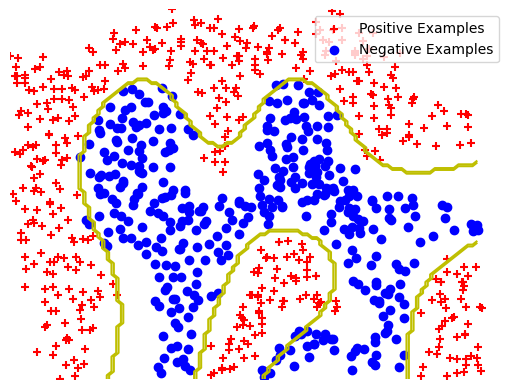

In [12]:
# as in Part 1

plt.scatter(X2[y2.flatten() == 1, 0], X2[y2.flatten() == 1, 1], c='r', marker='+', label='Positive Examples')
plt.scatter(X2[y2.flatten() == 0, 0], X2[y2.flatten() == 0, 1], c='b', marker='o', label='Negative Examples')
plt.legend()
plt.axis('off')

num=100
X_1,X_2 = np.meshgrid(np.linspace(X2[:,0].min(),X2[:,1].max(),num),np.linspace(X2[:,1].min(),X2[:,1].max(),num))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")



#Go back and check the classifiction performance of the 
#classifier with gamma=10

classifier = SVC(kernel='rbf', gamma=10)
classifier.fit(X2, y2.flatten())
print(classifier.score(X2, y2.flatten())*100)



### PART 3  - Nonlinear SVM with Gaussian Kernels, optimization of C and  $\sigma$ (Dataset 3)

File *ex6data3.mat* contains training data (X,y) and validation data (Xval, yval). 
Load them and plot the training data to get Fig.3. 

<img src="images/f3.png" style="width:350px;height:250px;">
<caption><center> **Fig.3 ** : **Dataset 3 (ex6data3.mat)** </center></caption>

In [13]:
# Read file ex6data3.mat and extract all saved arrays 
ex6_data3 = loadmat('ex6data3.mat')

X3 = ex6_data3['X']
y3 = ex6_data3['y']
Xval = ex6_data3['Xval']
yval = ex6_data3['yval']

X3.shape, y3.shape, Xval.shape, yval.shape

((211, 2), (211, 1), (200, 2), (200, 1))

(-0.64147445, 0.34193545000000003, -0.71945935, 0.6349563500000001)

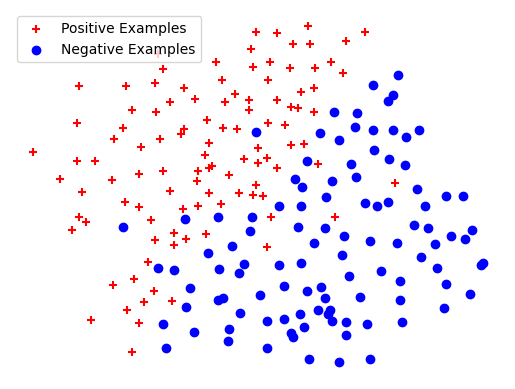

In [14]:
# Create Fig.3.
plt.scatter(X3[y3.flatten() == 1, 0], X3[y3.flatten() == 1, 1], c='r', marker='+', label='Positive Examples')
plt.scatter(X3[y3.flatten() == 0, 0], X3[y3.flatten() == 0, 1], c='b', marker='o', label='Negative Examples')
plt.legend()
plt.axis('off')


### Hyperparameter tuning

The task is to use the validation set Xval, yval to determine the best C and  $\sigma$ parameters.

For both C and $\sigma$, it is suggested to try the following values (0.01; 0.03; 0.1; 0.3; 1; 3; 10; 30). 

Function *dataset3Params* tries all possible pairs of values for C and  $\sigma$. For example, for the 8 values listed above, a total of 8^2 = 64 different models will be trained and evaluated (on the validation set). For the best parameters, the SVM should return a decision boundary similar to Fig. 4.

<img src="images/f4.png" style="width:350px;height:250px;">
<caption><center> **Fig.4 ** : **Dataset 3 (ex6data3.mat)** </center></caption>

In [15]:
def dataset3Params(X, y, Xval, yval,vals):
    """
    dataset3Params returns the optimal C and gamma(1/sigma) based on a cross-validation set.
    """
    acc = 0
    best_C=0
    best_gamma=0
    for i in vals:
        C= i
        for j in vals:
            gamma = 1/j
            classifier = SVC(C=C,gamma=gamma)
            classifier.fit(X,y)
            #prediction = classifier.predict(Xval)
            score = classifier.score(Xval,yval)
            if score>acc:
                acc =score
                best_C =C
                best_gamma=gamma
    return best_C, best_gamma

In [16]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

#What are the best C and sigma ?
best_C, best_gamma = dataset3Params(X3, y3.flatten(), Xval, yval.flatten(),vals)

#Build an SVM classifier with the best C and gamma and get classifier score of about 95% ? (training data accuracy) 
classifier = SVC(C=best_C, gamma=best_gamma)
classifier.fit(X3, y3.flatten())
print(classifier.score(X3, y3.flatten())*100)
print(best_C, best_gamma)


95.260663507109
0.3 100.0


### Plot data + decision boundary

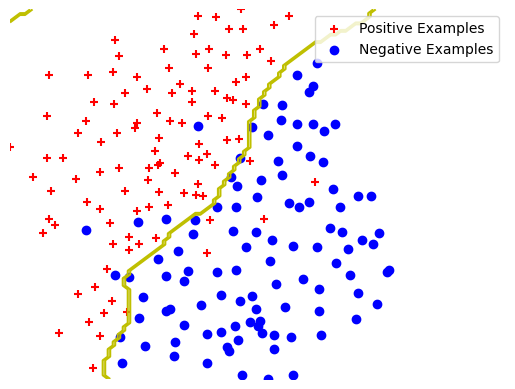

In [17]:
#Create Fig.4
# Plot the data
plt.scatter(X3[y3.flatten() == 1, 0], X3[y3.flatten() == 1, 1], c='r', marker='+', label='Positive Examples')
plt.scatter(X3[y3.flatten() == 0, 0], X3[y3.flatten() == 0, 1], c='b', marker='o', label='Negative Examples')
plt.legend()
plt.axis('off')


num=100
X_1,X_2 = np.meshgrid(np.linspace(X3[:,0].min(),X3[:,1].max(),num),np.linspace(X3[:,1].min(),X3[:,1].max(),num))
plt.contour(X_1,X_2,classifier.predict(np.array([X_1.ravel(),X_2.ravel()]).T).reshape(X_1.shape),1,colors="y")